In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from mpl_toolkits import mplot3d
from datetime import datetime
from matplotlib import cm
from itertools import chain

In [6]:
stock = 'AMZN'
data = yf.Ticker(stock)
list_of_mat = list(data.options)
list_of_mat

['2023-01-06',
 '2023-01-13',
 '2023-01-20',
 '2023-01-27',
 '2023-02-03',
 '2023-02-10',
 '2023-02-17',
 '2023-03-17',
 '2023-04-21',
 '2023-06-16',
 '2023-07-21',
 '2023-09-15',
 '2023-10-20',
 '2024-01-19',
 '2024-06-21',
 '2024-09-20',
 '2025-01-17']

In [9]:
today = datetime.now().date()
list_of_toe = []
for i in list_of_mat:
    i_date = datetime.strptime(i, '%Y-%m-%d').date()
    list_of_toe.append((i_date - today).days)
list_of_toe

[2, 9, 16, 23, 30, 37, 44, 72, 107, 163, 198, 254, 289, 380, 534, 625, 744]

In [11]:
list_of_calls = []
for i in list_of_mat:
    list_of_calls.append(data.option_chain(i).calls)
list_of_calls

[         contractSymbol             lastTradeDate  strike  lastPrice    bid  \
 0   AMZN230106C00050000 2023-01-03 15:35:42+00:00    50.0      34.60  35.60   
 1   AMZN230106C00055000 2022-12-29 16:24:40+00:00    55.0      28.50  30.60   
 2   AMZN230106C00056000 2022-12-30 20:37:45+00:00    56.0      27.06  29.55   
 3   AMZN230106C00057000 2022-12-30 20:37:45+00:00    57.0      26.25  28.55   
 4   AMZN230106C00060000 2023-01-03 15:02:33+00:00    60.0      25.25  25.55   
 ..                  ...                       ...     ...        ...    ...   
 60  AMZN230106C00124000 2023-01-03 15:52:23+00:00   124.0       0.01   0.00   
 61  AMZN230106C00125000 2022-12-22 18:28:46+00:00   125.0       0.01   0.00   
 62  AMZN230106C00130000 2022-12-20 15:52:54+00:00   130.0       0.01   0.00   
 63  AMZN230106C00135000 2022-12-23 19:31:11+00:00   135.0       0.01   0.00   
 64  AMZN230106C00140000 2023-01-04 15:23:17+00:00   140.0       0.01   0.00   
 
       ask  change  percentChange  vol

In [14]:
list_of_toe_extended = []
list_of_strikes = []
list_of_imp_vol = []
for i in range(len(list_of_calls)):
    list_of_strikes.append(list_of_calls[i]['strike'])
    list_of_toe_extended.append(np.repeat(list_of_toe[i], len(list_of_calls[i])))
    list_of_imp_vol.append(list_of_calls[i]['impliedVolatility'])

In [25]:
list_of_toe_extended


[array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9]),
 array([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
    

In [16]:
list_of_imp_vol

[0     0.000010
 1     2.195317
 2     1.718751
 3     0.000010
 4     0.000010
         ...   
 60    1.437503
 61    1.375003
 62    1.593752
 63    1.625002
 64    1.750001
 Name: impliedVolatility, Length: 65, dtype: float64,
 0     1.578127
 1     1.226566
 2     0.000010
 3     0.585942
 4     0.621098
 5     0.560551
 6     0.521489
 7     0.517583
 8     0.505864
 9     0.530278
 10    0.501958
 11    0.485845
 12    0.491216
 13    0.484380
 14    0.479742
 15    0.475103
 16    0.469976
 17    0.472662
 18    0.455572
 19    0.454595
 20    0.444341
 21    0.445318
 22    0.441900
 23    0.437994
 24    0.437506
 25    0.435553
 26    0.439459
 27    0.442388
 28    0.452154
 29    0.460943
 30    0.470708
 31    0.475591
 32    0.494146
 33    0.503911
 34    0.517583
 35    0.527348
 36    0.535161
 37    0.539067
 38    0.562504
 39    0.558598
 40    0.578129
 41    0.585942
 42    0.585942
 43    0.671878
 44    0.687503
 45    0.750003
 46    0.875001
 Name: impliedVola

In [17]:
list_of_strikes


[0      50.0
 1      55.0
 2      56.0
 3      57.0
 4      60.0
       ...  
 60    124.0
 61    125.0
 62    130.0
 63    135.0
 64    140.0
 Name: strike, Length: 65, dtype: float64,
 0      50.0
 1      55.0
 2      65.0
 3      68.0
 4      70.0
 5      73.0
 6      74.0
 7      75.0
 8      76.0
 9      77.0
 10     78.0
 11     79.0
 12     80.0
 13     81.0
 14     82.0
 15     83.0
 16     84.0
 17     85.0
 18     86.0
 19     87.0
 20     88.0
 21     89.0
 22     90.0
 23     91.0
 24     92.0
 25     93.0
 26     94.0
 27     95.0
 28     96.0
 29     97.0
 30     98.0
 31     99.0
 32    100.0
 33    101.0
 34    102.0
 35    103.0
 36    104.0
 37    105.0
 38    106.0
 39    107.0
 40    108.0
 41    109.0
 42    110.0
 43    115.0
 44    120.0
 45    125.0
 46    130.0
 Name: strike, dtype: float64,
 0        50.0
 1        51.0
 2        52.0
 3        53.0
 4        54.0
         ...  
 400    5100.0
 401    5200.0
 402    5300.0
 403    5400.0
 404    5500.0
 Name: 

In [31]:
list_of_toe_extended = list(chain(*list_of_toe_extended))
list_of_strikes = list(chain(*list_of_strikes))
list_of_imp_vol = list(chain(*list_of_imp_vol))

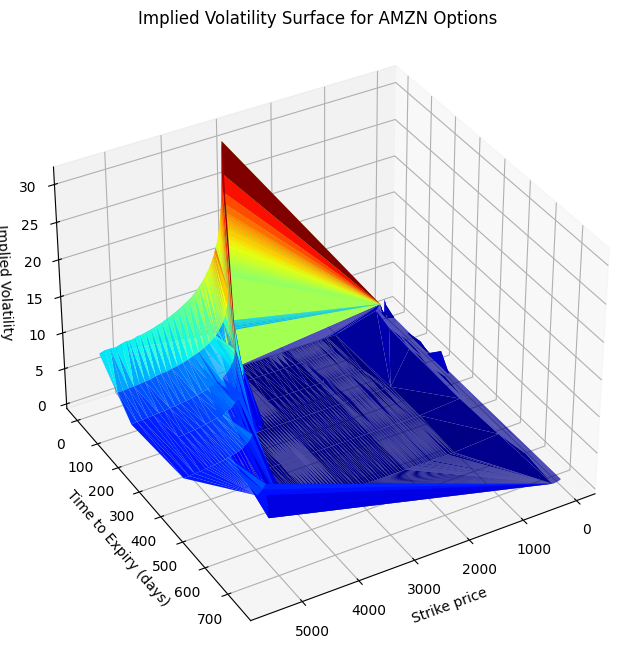

In [49]:
fig = plt.figure(figsize=(8,8))
axs = plt.axes(projection='3d')
axs.plot_trisurf(list_of_strikes, list_of_toe_extended, list_of_imp_vol, cmap=cm.jet)
axs.set_xlabel('Strike price')
axs.view_init(35, 60) 
axs.set_ylabel('Time to Expiry (days)')
axs.set_zlabel('Implied Volatility')
plt.title('Implied Volatility Surface for AMZN Options')
plt.show()